In [83]:
import base64
from collections import deque
import os
import pathlib
import shutil

from IPython import display as ipydisplay
import torch
from utils_env import MyEnv
from utils_drl import Agent

In [84]:
target = 95
model_name = f"model_{target:03d}"
model_path = f"./models/{model_name}"
device = torch.device("cpu")
env = MyEnv(device)
agent = Agent(env.get_action_dim(), device, 0.99, 0, 0, 0, 1, model_path)

In [85]:
obs_queue = deque(maxlen=5)
avg_reward, frames = env.evaluate(obs_queue, agent, render=True)
print(f"Avg. Reward: {avg_reward:.1f}")

!rm -r eval_*
target_dir = f"eval_{target:03d}"
os.mkdir(target_dir)
for ind, frame in enumerate(frames):
    frame.save(os.path.join(target_dir, f"{ind:06d}.png"), format="png")

Avg. Reward: 106.0
rm: cannot remove 'eval_*': No such file or directory


In [86]:
path_to_mp4 = os.path.join(target_dir, "movie.mp4")

In [87]:
if not os.path.exists(path_to_mp4):
    shutil.move(target_dir, "tmp_eval_frames")
    # Generate an mp4 video from the frames
    !ffmpeg -i "./tmp_eval_frames/%06d.png" -pix_fmt yuv420p -y ./tmp_eval_movie.mp4 > /dev/null 2>&1
    !rm -r tmp_eval_frames
    os.mkdir(target_dir)
    shutil.move("tmp_eval_movie.mp4", path_to_mp4)

In [88]:
HTML_TEMPLATE = """<video alt="{alt}" autoplay loop controls style="height: 400px;">
  <source src="data:video/mp4;base64,{data}" type="video/mp4" />
</video>"""

def show_video(path_to_mp4: str) -> None:
    """show_video creates an HTML element to display the given mp4 video in IPython."""
    mp4 = pathlib.Path(path_to_mp4)
    video_b64 = base64.b64encode(mp4.read_bytes())
    html = HTML_TEMPLATE.format(alt=mp4, data=video_b64.decode('ascii'))
    ipydisplay.display(ipydisplay.HTML(data=html))

In [89]:
show_video(path_to_mp4)

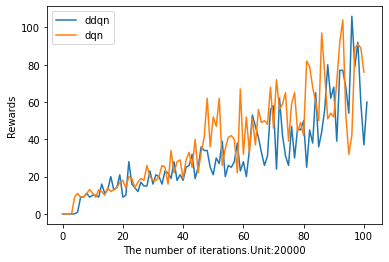

In [106]:
import matplotlib.pyplot as plt
file=open("rewardddqn.txt")
line1=file.readlines()
line1=[x.strip() for x in line1]
line1=[float(x) for x in line1]
file.close()
file=open("rewarddqn.txt")
line2=file.readlines()
line2=[x.strip() for x in line2]
line2=[float(x) for x in line2]
file.close()
plt.figure(1)
plt.plot(line1)
plt.plot(line2)
plt.legend(['ddqn','dqn'])
plt.xlabel('The number of iterations.Unit:20000')
plt.ylabel('Rewards')
plt.show()